48760
48760
Epoch 1/10
1524/1524 [==============================] - 4s 2ms/step - loss: 0.5427 - accuracy: 0.7337
Epoch 2/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.4673 - accuracy: 0.7867
Epoch 3/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.4388 - accuracy: 0.8053
Epoch 4/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.4211 - accuracy: 0.8149
Epoch 5/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.4089 - accuracy: 0.8224
Epoch 6/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.3993 - accuracy: 0.8277
Epoch 7/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8308
Epoch 8/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.3869 - accuracy: 0.8335
Epoch 9/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.3822 - accuracy: 0.8355
Epoch 10/10
381/381 [==============================] - 1s 2ms/step
C:\

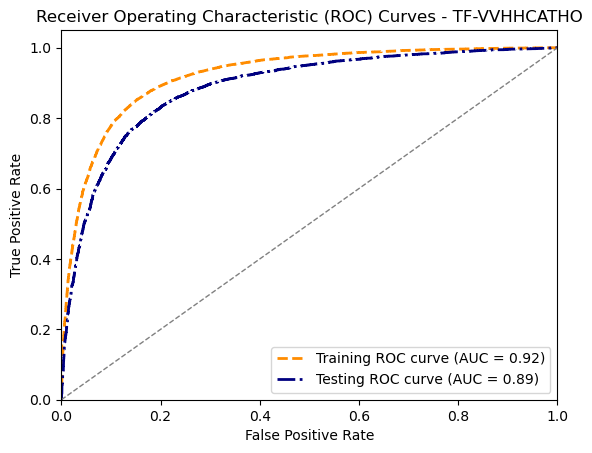

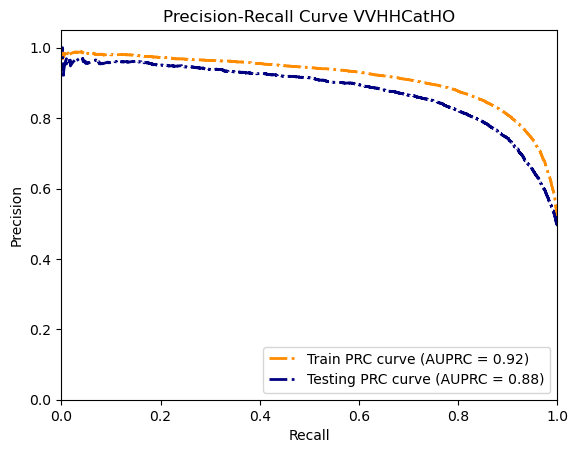

Epoch 1/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.7800 - accuracy: 0.5010
Epoch 2/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6973 - accuracy: 0.5170
Epoch 3/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6917 - accuracy: 0.5264
Epoch 4/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6901 - accuracy: 0.5321
Epoch 5/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6890 - accuracy: 0.5362
Epoch 6/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6877 - accuracy: 0.5420
Epoch 7/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6861 - accuracy: 0.5476
Epoch 8/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6845 - accuracy: 0.5518
Epoch 9/10
1524/1524 [==============================] - 3s 2ms/step - loss: 0.6832 - accuracy: 0.5542
Epoch 10/10
381/381 [==============================] - 1s 1ms/step


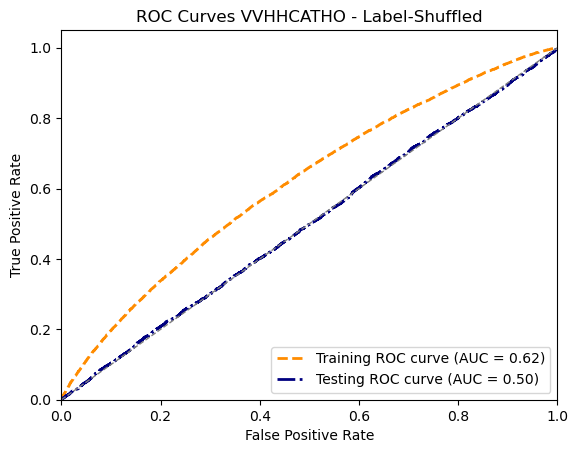

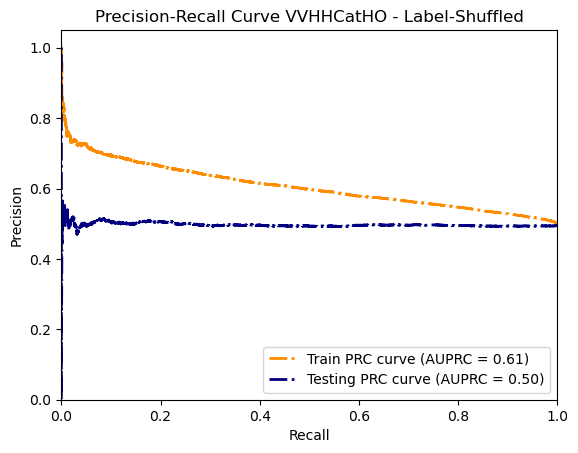

In [25]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
import tensorflow as tf
import tensorflow.keras.models
from tensorflow.keras.models import Sequential

datfile = r'C:\Users\xdDeep\Desktop\RK-DD-DT-DDT\Robo-SMI-Dis-trainData.csv'  # for the smiles data
#datfile = r'C:\Users\xdDeep\Desktop\RK-DD-DT-DDT\DDpairstrainData.csv'  # for the DD pairs BioWV data
df = pd.read_csv(datfile)

# Drop specified fields
df = df.drop(columns=['CID', 'DName', 'SEName'])     # for the DD pairs Smi-FP-PCA-BioWV data
#df = df.drop(columns=['cName', 'cName2', 'dName'])  # for the DD pairs BioWV data

y = df['label']
X = df.drop(columns=['label'])

# instantiate StandardScaler object
scaler = StandardScaler()

# fit and transform the dataframe X with StandardScaler
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = Xs

#y = pd.DataFrame(y.sample(frac=1).reset_index(drop=True))


for rnd in [9]:
    ##################################################
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd)
    ##################################################

    drug_emb = X_train.iloc[:, :200].values
    dis_emb = X_train.iloc[:, 200:400].values
    drug_emb_test = X_test.iloc[:, :200].values
    dis_emb_test = X_test.iloc[:, 200:400].values

    #print(len(drug_emb[0]))
    print(len(drug_emb))
    print(len(dis_emb))

    Vector_dim = 200
    hidden_dim1 = 20
    hidden_dim_concatenated = 5

    np.random.seed(42)
    tf.random.set_seed(42)
    
    ## define a neural network structure ##
    # Define input layers for v1 and v2
    input_v1 = Input(shape=(Vector_dim,))
    input_v2 = Input(shape=(Vector_dim,))
    
    # Define hidden layers for v1 and v2
    hidden_v1 = Dense(hidden_dim1, activation='relu')(input_v1)
    hidden_v2 = Dense(hidden_dim1, activation='relu')(input_v2)
    # Concatenate the output of the hidden layers
    concatenated = Concatenate()([hidden_v1, hidden_v2])
    output = Dense(1, activation='sigmoid')(concatenated)
    # Define the model with two inputs and one output
    model = Model(inputs=[input_v1, input_v2], outputs=output)
    ##########################################################
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x=[drug_emb, dis_emb], y=y_train, epochs=10, batch_size=32)

    # Predict the output for the test data
    y_train_pred = model.predict(x=[drug_emb, dis_emb])
    y_test_pred = model.predict(x=[drug_emb_test, dis_emb_test])

    print(datfile)
    
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt

    fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    # Plot the ROC curves
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, linestyle='--', label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='navy', lw=2, linestyle='-.', label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves - TF-VVHHCATHO')
    plt.legend(loc="lower right")
    plt.show()


    # Calculate the precision, recall, and thresholds
    from sklearn.metrics import precision_recall_curve, average_precision_score

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred)

    # Calculate the AUPRC
    auprc = average_precision_score(y_test, y_test_pred)
    auprc_train = average_precision_score(y_train, y_train_pred)

    # Plot the PRC curve
    plt.plot(recall_train, precision_train, color='darkorange', lw=2, linestyle='-.', label='Train PRC curve (AUPRC = %0.2f)' % auprc_train)
    plt.plot(recall, precision, color='navy', lw=2, linestyle='-.', label='Testing PRC curve (AUPRC = %0.2f)' % auprc)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve VVHHCatHO')
    plt.legend(loc="lower right")

    plt.show()

    
    
    y_train = pd.DataFrame(y_train.sample(frac=1).reset_index(drop=True))
    y_test = pd.DataFrame(y_test.sample(frac=1).reset_index(drop=True))

    model.fit(x=[drug_emb, dis_emb], y=y_train, epochs=10, batch_size=32)

    # Predict the output for the test data
    y_train_pred = model.predict(x=[drug_emb, dis_emb])
    y_test_pred = model.predict(x=[drug_emb_test, dis_emb_test])

    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt

    fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    # Plot the ROC curves
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, linestyle='--', label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='navy', lw=2, linestyle='-.', label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves VVHHCATHO - Label-Shuffled')
    plt.legend(loc="lower right")
    plt.show()


    # Calculate the precision, recall, and thresholds
    from sklearn.metrics import precision_recall_curve, average_precision_score

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred)

    # Calculate the AUPRC
    auprc = average_precision_score(y_test, y_test_pred)
    auprc_train = average_precision_score(y_train, y_train_pred)

    # Plot the PRC curve
    plt.plot(recall_train, precision_train, color='darkorange', lw=2, linestyle='-.', label='Train PRC curve (AUPRC = %0.2f)' % auprc_train)
    plt.plot(recall, precision, color='navy', lw=2, linestyle='-.', label='Testing PRC curve (AUPRC = %0.2f)' % auprc)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve VVHHCatHO - Label-Shuffled')
    plt.legend(loc="lower right")

    plt.show()


    # when you're done with the model, release it by clearing the session
    tf.keras.backend.clear_session()


